# CMCO Graph

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as seabornInstance 
from sklearn import metrics

In [3]:
df = pd.read_csv(r'C19 CMCO.csv')
df = df.dropna()

In [4]:
print(df)

    day      date  new_cases_malaysia  total_cases_malaysia  \
0   102  04-05-20                  55                  6353   
1   103  05-05-20                  30                  6383   
2   104  06-05-20                  45                  6428   
3   105  07-05-20                  39                  6467   
4   106  08-05-20                  68                  6535   
5   107  09-05-20                  54                  6589   
6   108  10-05-20                  67                  6656   
7   109  11-05-20                  70                  6726   
8   110  12-05-20                  16                  6742   
9   111  13-05-20                  37                  6779   
10  112  14-05-20                  40                  6819   
11  113  15-05-20                  36                  6855   
12  114  16-05-20                  17                  6872   
13  115  17-05-20                  22                  6894   
14  116  18-05-20                  47                  

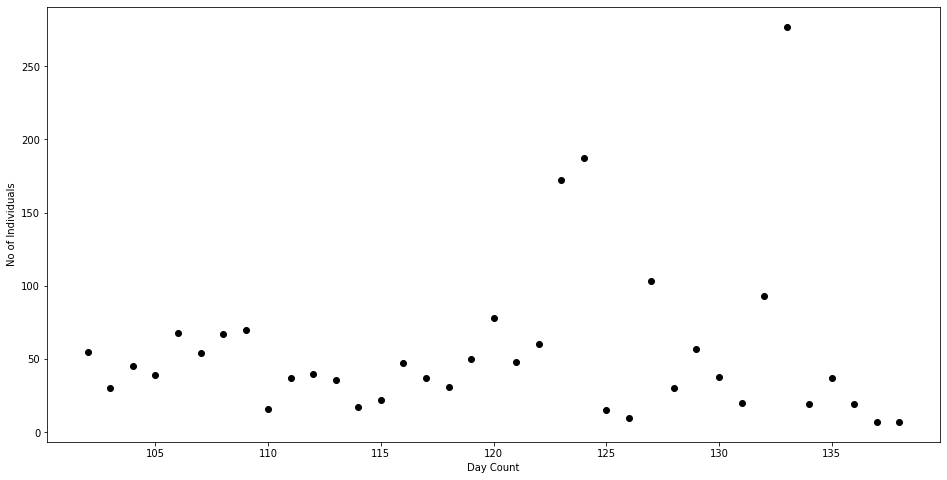

In [5]:
plt.figure(figsize=(16,8))
plt.scatter(
    df['day'],
    df['new_cases_malaysia'],
    c='black'
)

plt.xlabel("Day Count")
plt.ylabel("No of Individuals")
plt.show()

In [6]:

X = df['day'].values.reshape(-1,1)
Y = df['new_cases_malaysia'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,Y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = -2.0171 + 0.47582X


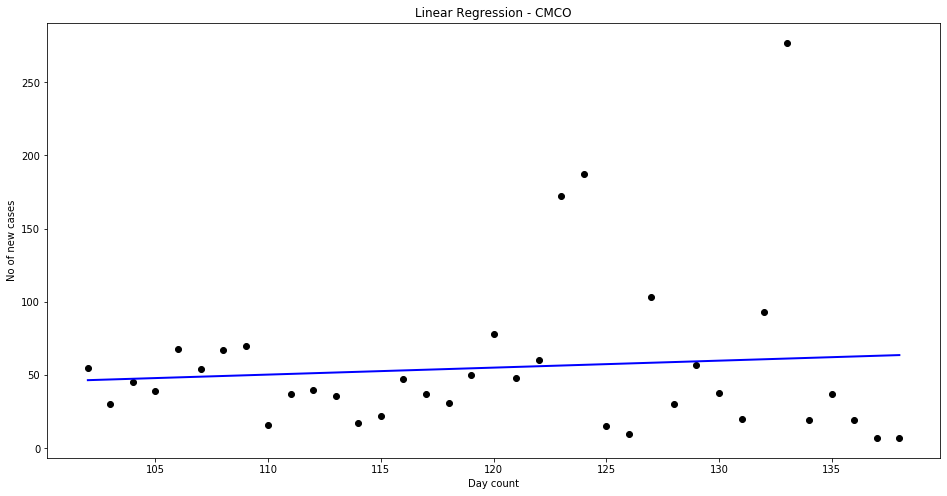

In [7]:
predictions = reg.predict(X)
plt.figure(figsize=(16,8))
plt.scatter(
    df['day'],
    df['new_cases_malaysia'],
    c='black'
)

plt.plot(
    df['day'],
    predictions,
    c='blue',
    linewidth = 2
)

plt.xlabel("Day count")
plt.ylabel("No of new cases")
plt.title('Linear Regression - CMCO')
plt.show()

In [11]:
X = df['day']
Y = df['new_cases_malaysia']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print("================================ CMCO Results ================================")
print(est2.summary())

================================ CMCO Results ================================
                            OLS Regression Results                            
Dep. Variable:     new_cases_malaysia   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.3197
Date:                Wed, 01 Jul 2020   Prob (F-statistic):              0.575
Time:                        21:23:50   Log-Likelihood:                -199.51
No. Observations:                  37   AIC:                             403.0
Df Residuals:                      35   BIC:                             406.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------